In [2]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import sklearn
from sklearn import preprocessing, svm, tree, linear_model, datasets,cross_validation
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.ensemble as ske
from sklearn.preprocessing import Imputer

In [3]:
data= pd.read_csv('train.csv')

In [4]:
data.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
numerical_feat= data.select_dtypes(include=[np.number])

In [6]:
for columns in numerical_feat:
    print(columns)

ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History


In [7]:
listOfZero=[]
for columns in numerical_feat:
    if data[columns].sum()==0:
        listOfZero.append(columns)

In [8]:
listOfZero

[]

In [9]:
# converting Loan Status into categorical for the sake of identifying trend over education, gender, and credit history
data['Loan_Status_Categorical']=sklearn.preprocessing.LabelEncoder().fit_transform(data.Loan_Status)

In [10]:
groupby_dependents= data.groupby(['Gender','Education','Credit_History']).mean()
groupby_dependents

ApplicantIncome  CoapplicantIncome  \
Gender Education    Credit_History                                       
Female Graduate     0.0                 4141.142857        1148.785714   
                    1.0                 4961.666667         662.492754   
       Not Graduate 0.0                 2233.000000        1079.000000   
                    1.0                 5251.866667         461.733333   
Male   Graduate     0.0                 7530.531915        1521.106383   
                    1.0                 5778.188742        1863.642119   
       Not Graduate 0.0                 3524.318182        1838.318182   
                    1.0                 3606.575000        1268.612500   

                                    LoanAmount  Loan_Amount_Term  \
Gender Education    Credit_History                                 
Female Graduate     0.0             123.714286        368.571429   
                    1.0             130.283582        348.529412   
       Not Graduate 0.0             129.000000        360.000000   
                    1.0             109.266667        360.000000   
Male   Graduate     0.0             164.133333        338.181818   
                    1.0             154.510274        344.657718   
       Not Graduate 0.0             129.285714        327.000000   
                    1.0             115.413333        325.076923   

                                    Loan_Status_Categorical  
Gender Education    Credit_History                           
Female Graduate     0.0                            0.071429  
                    1.0                            0.753623  
       Not Graduate 0.0                            0.000000  
                    1.0                            0.800000  
Male   Graduate     0.0                            0.106383  
                    1.0                            0.821192  
       Not Graduate 0.0                            0.045455  
                    1.0                            0.737500

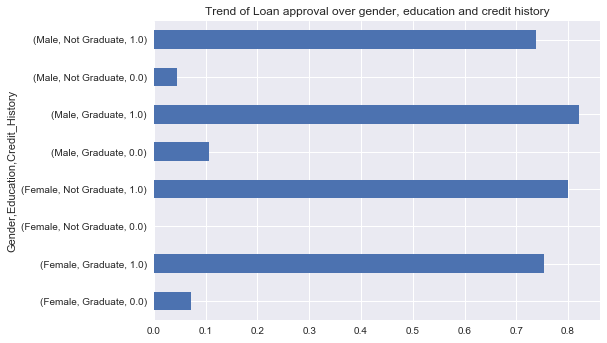

In [11]:
groupby_dependents.Loan_Status_Categorical.plot.barh()
plt.title('Trend of Loan approval over gender, education and credit history')
plt.show()

In [12]:
null_counts= pd.DataFrame(data.isnull().sum().sort_values(ascending=False))
null_counts.columns=['Null Count']
null_counts.index.name='Feature'
null_counts

,Null Count
Feature,
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
Gender,13
Married,3
Loan_Status_Categorical,0
Loan_Status,0


In [13]:
Nulls_in_data=null_counts[null_counts['Null Count']>0]

In [14]:
Nulls_in_data

,Null Count
Feature,
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
Gender,13
Married,3


In [15]:
NullColumns=[]
for row in Nulls_in_data.itertuples():
    print (row.Index)
    NullColumns.append(row.Index)

Credit_History
Self_Employed
LoanAmount
Dependents
Loan_Amount_Term
Gender
Married


In [16]:
def valueCounts(column):
    return column.value_counts()

In [17]:
nullDict={}
for columns in NullColumns:
    if (data[columns].nunique(dropna=True) < 20):
        nullDict[columns]=dict(data[columns].value_counts())

In [18]:
nullDict

{'Credit_History': {0.0: 89, 1.0: 475},
 'Dependents': {'0': 345, '1': 102, '2': 101, '3+': 51},
 'Gender': {'Female': 112, 'Male': 489},
 'Loan_Amount_Term': {12.0: 1,
  36.0: 2,
  60.0: 2,
  84.0: 4,
  120.0: 3,
  180.0: 44,
  240.0: 4,
  300.0: 13,
  360.0: 512,
  480.0: 15},
 'Married': {'No': 213, 'Yes': 398},
 'Self_Employed': {'No': 500, 'Yes': 82}}

In [19]:
#Let us insert the null values with the median values. You can either use imputer available in sklearn or do it like 
# below

In [20]:
data['Gender']=data['Gender'].fillna('Male')
data['Married']=data['Married'].fillna('Yes')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(360)
data['Self_Employed']=data['Self_Employed'].fillna('No')
data['Dependents']=data['Dependents'].fillna('0')
data['Credit_History']=data['Credit_History'].fillna(1)

In [21]:
#data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())

In [22]:
null_counts= pd.DataFrame(data.isnull().sum().sort_values(ascending=False))
null_counts.columns=['Null Count']
null_counts.index.name='Feature'
null_counts

,Null Count
Feature,
LoanAmount,22
Loan_Status_Categorical,0
Loan_Status,0
Property_Area,0
Credit_History,0
Loan_Amount_Term,0
CoapplicantIncome,0
ApplicantIncome,0
Self_Employed,0


In [23]:
#dropping the loan_amount null columns
data=data.dropna()


In [24]:
String_features= data.select_dtypes(exclude=[np.number])

In [25]:
for columns in String_features:
    print(columns)

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
Property_Area
Loan_Status


In [26]:
#del data['Loan_ID']

In [27]:
# converting the string columns into numerical columns using encoding techniques.

In [28]:
Loan_ID_cat=sklearn.preprocessing.LabelEncoder().fit_transform(data.Loan_ID)
Gender_cat=sklearn.preprocessing.LabelEncoder().fit_transform(data.Gender)
Married_cat=sklearn.preprocessing.LabelEncoder().fit_transform(data.Married)
Dependents_cat=sklearn.preprocessing.LabelEncoder().fit_transform(data.Dependents)
Education_cat=sklearn.preprocessing.LabelEncoder().fit_transform(data.Education)
Self_Employed_cat=sklearn.preprocessing.LabelEncoder().fit_transform(data.Self_Employed)
Property_Area_cat=sklearn.preprocessing.LabelEncoder().fit_transform(data.Property_Area)
data['Loan_Status_Categorical']=sklearn.preprocessing.LabelEncoder().fit_transform(data.Loan_Status)

In [29]:
data['Loan_ID_cat']=Loan_ID_cat
data['Gender_cat']=Gender_cat
data['Married_cat']=Married_cat
data['Dependents_cat']=Dependents_cat
data['Education_cat']=Education_cat
data['Self_Employed_cat']=Self_Employed_cat
data['Property_Area_cat']=Property_Area_cat

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 1 to 613
Data columns (total 21 columns):
Loan_ID                    592 non-null object
Gender                     592 non-null object
Married                    592 non-null object
Dependents                 592 non-null object
Education                  592 non-null object
Self_Employed              592 non-null object
ApplicantIncome            592 non-null int64
CoapplicantIncome          592 non-null float64
LoanAmount                 592 non-null float64
Loan_Amount_Term           592 non-null float64
Credit_History             592 non-null float64
Property_Area              592 non-null object
Loan_Status                592 non-null object
Loan_Status_Categorical    592 non-null int64
Loan_ID_cat                592 non-null int64
Gender_cat                 592 non-null int64
Married_cat                592 non-null int64
Dependents_cat             592 non-null int64
Education_cat              592 non-null int64
Self_

In [31]:
String_features= data.select_dtypes(exclude=[np.number])
for columns in String_features:
    print(columns)

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
Property_Area
Loan_Status


In [32]:
for columns in String_features:
    del data[columns]

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 1 to 613
Data columns (total 13 columns):
ApplicantIncome            592 non-null int64
CoapplicantIncome          592 non-null float64
LoanAmount                 592 non-null float64
Loan_Amount_Term           592 non-null float64
Credit_History             592 non-null float64
Loan_Status_Categorical    592 non-null int64
Loan_ID_cat                592 non-null int64
Gender_cat                 592 non-null int64
Married_cat                592 non-null int64
Dependents_cat             592 non-null int64
Education_cat              592 non-null int64
Self_Employed_cat          592 non-null int64
Property_Area_cat          592 non-null int64
dtypes: float64(4), int64(9)
memory usage: 64.8 KB


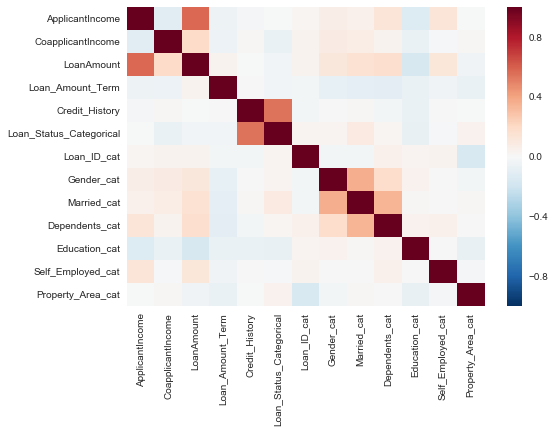

In [34]:
sb.heatmap(data.corr())
plt.show()

In [35]:
target= data.Loan_Status_Categorical

In [36]:
del data['Loan_Status_Categorical']

In [37]:
#scaling the data 
norm_data=sklearn.preprocessing.scale(data)

In [38]:
#dividing the data on the regular data
X_train, X_test, y_train, y_test= cross_validation.train_test_split(data, target, test_size=0.30)


In [46]:
#Dividing the data on the normalized data.
X_train_norm, X_test_norm, y_train_norm, y_test_norm= cross_validation.train_test_split(norm_data, target, test_size=0.32)

In [47]:
#Running the model on the regular data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
z=logreg.fit(X_train, y_train)

In [48]:
y_pred = z.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [49]:
# Now running the model on the normalized data
logreg = LogisticRegression()
z_norm=logreg.fit(X_train_norm, y_train_norm)

In [50]:
# Accuracy of the model on the normalized data
y_pred_norm = z_norm.predict(X_test_norm)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_norm, y_test_norm)))

Accuracy of logistic regression classifier on test set: 0.81


In [51]:
#Now let's try the same with Gradient Boosting Algorithm
import sklearn.ensemble as ske
claf_GB= ske.GradientBoostingClassifier(n_estimators=350)
from sklearn import datasets, tree,svm, cross_validation, preprocessing, metrics

In [52]:
#Shuffle split with regular data
shuffle_validator= cross_validation.ShuffleSplit(len(data), n_iter=25, test_size=0.35,random_state=0)

In [53]:
Scores_GB= cross_validation.cross_val_score(claf_GB, data,target, cv=shuffle_validator)

In [54]:
print("Accuracy : %0.6f (+/- %0.2f )" % (Scores_GB.mean(), Scores_GB.std()))

Accuracy : 0.773462 (+/- 0.02 )


In [55]:
# Now, let's run the model with normalized data
shuffle_validator_norm= cross_validation.ShuffleSplit(len(norm_data), n_iter=40, test_size=0.40,random_state=0)

In [56]:
Scores_GB_norm= cross_validation.cross_val_score(claf_GB, norm_data,target, cv=shuffle_validator_norm)
print("Accuracy : %0.6f (+/- %0.2f )" % (Scores_GB_norm.mean(), Scores_GB_norm.std()))

Accuracy : 0.773523 (+/- 0.02 )


In [57]:
gbs=claf_GB.fit(X_train, y_train)

In [58]:
y_testing=gbs.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_lp = accuracy_score(y_test, y_testing)
print("Accuracy: %.2f%%" % (accuracy_lp * 100.0))

Accuracy: 77.53%


In [62]:
#Now again, let's try with Extreme Gradient Boosting Algorithm
import xgboost as xgb

In [67]:
gbm = xgb.XGBClassifier(max_depth=5, n_estimators=320, learning_rate=0.054).fit(X_train, y_train)
predictions = gbm.predict(X_test)
from sklearn.metrics import accuracy_score

In [68]:
# printing the accuracy of the xgboost
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.90%


In [75]:
# Let's do the same with normalized data
gbm_norm = xgb.XGBClassifier(max_depth=6, n_estimators=320, learning_rate=0.054).fit(X_train_norm, y_train_norm)
predictions_norm = gbm_norm.predict(X_test_norm)
from sklearn.metrics import accuracy_score

In [76]:
# printing the accuracy of the xgboost normalized data
accuracy = accuracy_score(y_test_norm, predictions_norm)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.47%
